#Install Kaggle

In [ ]:
!gdown --id '11FrbjVv6rOQnzvF1VCIwLbVkUfHXND4m'
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Downloading...
From: https://drive.google.com/uc?id=11FrbjVv6rOQnzvF1VCIwLbVkUfHXND4m
To: /content/kaggle.json
100% 67.0/67.0 [00:00<00:00, 62.2kB/s]
mkdir: cannot create directory ‘/root/.kaggle’: File exists


#Download dataset files

In [ ]:
# Download dataset files
!kaggle competitions download -c titanic
# ! unzip credit-card-approval-prediction.zip

train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import tensorflow as tf 
%matplotlib inline 


#Invistigate dataset

In [ ]:
train_df=pd.read_csv('train.csv',index_col='PassengerId')
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
train_df['Ticket']=train_df['Ticket'].apply(lambda x : x.split(' ')[-1] if len(x.split(' ')) >=2 else x)
train_df['Ticket']=train_df['Ticket'].apply(lambda x : x if x[0].isdigit() else np.NAN)

Name ,Ticket columns are unnessecary ,so i will drop them

In [ ]:
train_df=train_df.drop(['Name'],axis=1)
# train_df=train_df.drop(['Name','Ticket'],axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,17599,71.2833,C85,C
3,1,3,female,26.0,0,0,3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,female,19.0,0,0,112053,30.0000,B42,S
889,0,3,female,NaN,1,2,6607,23.4500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    887 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


There is 204 available information from Cabin column and about 700 null values ,so its exisance is unnessecary 

In [ ]:
train_df=train_df.drop('Cabin',axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    887 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


#Check duplication

In [ ]:
train_df.duplicated().sum()


15

In [ ]:
train_df.drop_duplicates(inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    int64  
 1   Pclass    876 non-null    int64  
 2   Sex       876 non-null    object 
 3   Age       711 non-null    float64
 4   SibSp     876 non-null    int64  
 5   Parch     876 non-null    int64  
 6   Ticket    872 non-null    object 
 7   Fare      876 non-null    float64
 8   Embarked  874 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 68.4+ KB


#Dealing with missing values
Age column will fill with its mean and Embarked column will fill with its mode value

In [ ]:
from sklearn.impute import SimpleImputer

numirical_imputer=SimpleImputer(strategy='median')
categorical_imputer=SimpleImputer(strategy='most_frequent')
train_df[['Age','Parch','Ticket']]=numirical_imputer.fit_transform(train_df[['Age','Parch','Ticket']])
train_df[['Embarked','Sex','Fare']]=categorical_imputer.fit_transform(train_df[['Embarked','Sex','Fare']])
# train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
# mode_of_embardked=train_df['Embarked'].mode()[0]
# print(mode_of_embardked)
# train_df['Embarked'].fillna(mode_of_embardked,inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    int64  
 1   Pclass    876 non-null    int64  
 2   Sex       876 non-null    object 
 3   Age       876 non-null    float64
 4   SibSp     876 non-null    int64  
 5   Parch     876 non-null    float64
 6   Ticket    876 non-null    float64
 7   Fare      876 non-null    float64
 8   Embarked  876 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 68.4+ KB


In [ ]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0.0,21171.0,7.2500,S
2,1,1,female,38.0,1,0.0,17599.0,71.2833,C
3,1,3,female,26.0,0,0.0,3101282.0,7.9250,S
4,1,1,female,35.0,1,0.0,113803.0,53.1000,S
5,0,3,male,35.0,0,0.0,373450.0,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0.0,211536.0,13.0000,S
888,1,1,female,19.0,0,0.0,112053.0,30.0000,S
889,0,3,female,28.0,1,2.0,6607.0,23.4500,S


#Data visualization

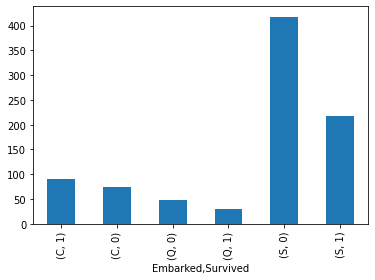

In [ ]:
train_df.groupby('Embarked')['Survived'].value_counts().plot(kind='bar')

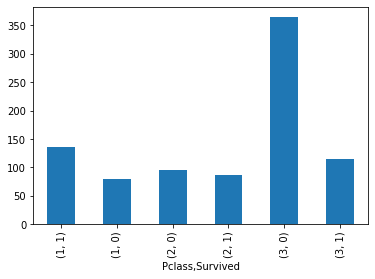

In [ ]:
train_df.groupby('Pclass')['Survived'].value_counts().plot(kind='bar')

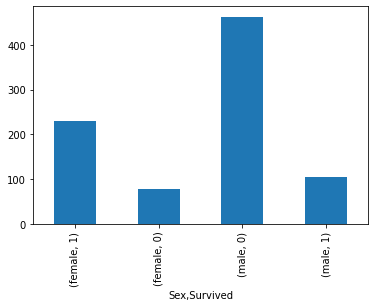

In [ ]:
train_df.groupby('Sex')['Survived'].value_counts().plot(kind='bar')

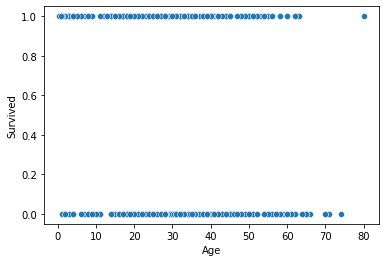

In [ ]:
sns.scatterplot(x=train_df.Age,y=train_df.Survived)

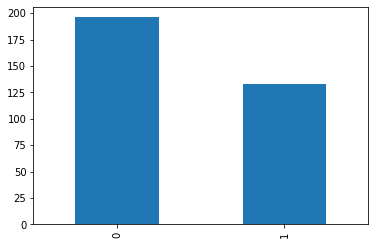

In [ ]:
old_people=train_df[train_df['Age']>=train_df['Age'].mean()]
young_people=train_df[train_df['Age']<train_df['Age'].mean()]
old_people['Survived'].value_counts().plot(kind='bar')
# plt.pie(x=old_people['Survived'].value_counts(),autopct='%1.0f%%',labels=['Die','Survived'])

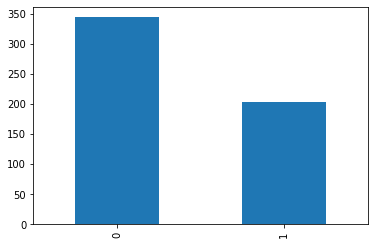

In [ ]:
young_people['Survived'].value_counts().plot(kind='bar')
# plt.pie(x=young_people['Survived'].value_counts(),autopct='%1.0f%%',labels=['Die','Survived'])

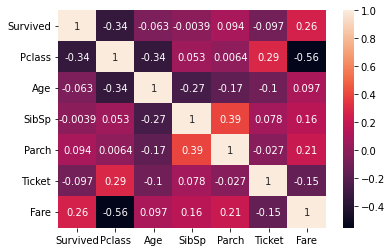

In [ ]:
sns.heatmap(train_df.corr(),annot=True)

#Feature Engineering

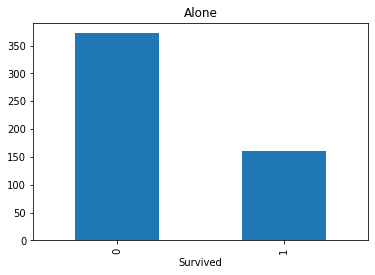

Text(0.5, 1.0, 'With Family')

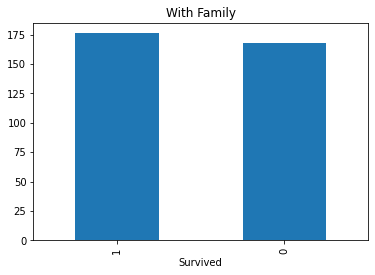

In [ ]:
train_df['IsAlone']=train_df['SibSp'] + train_df['Parch']
train_df['IsAlone']=train_df['IsAlone'].apply(lambda x: 0 if x >0 else 1)
train_df.groupby('IsAlone')['Survived'].value_counts()[1].plot(kind='bar')
plt.title('Alone')
plt.show()
train_df.groupby('IsAlone')['Survived'].value_counts()[0].plot(kind='bar')
plt.title('With Family')

#Check outliers

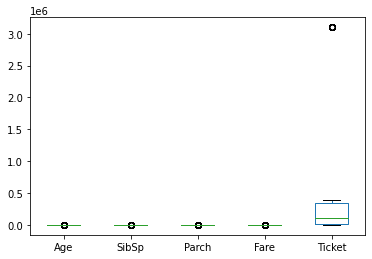

In [ ]:
continuos=['Age','SibSp','Parch','Fare','Ticket']
train_df[continuos].plot(kind='box')

Remove outliers

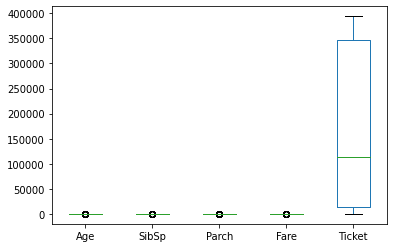

In [ ]:
for col in ['Ticket','Fare'] :
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3-Q1
    train_df=train_df[(Q1-1.5*IQR <= train_df[col]) & (train_df[col] <= Q3+1.5*IQR)]
train_df[continuos].plot(kind='box')

#Features and target split

In [ ]:
x=train_df.drop('Survived',axis=1)
y=train_df['Survived']

#Normalization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33913cb1d0>,
      dtype=object)

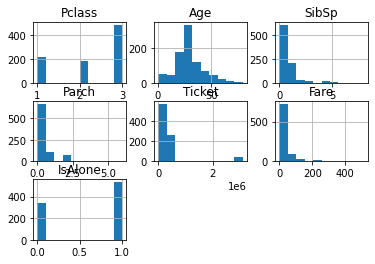

In [ ]:
x.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff149be7f10>,
      dtype=object)

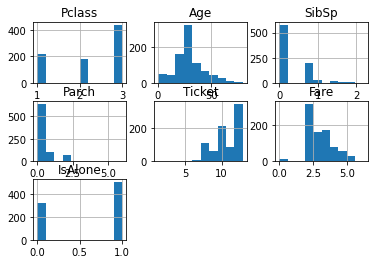

In [ ]:
x['SibSp']=np.log1p(x['SibSp'])
x['Fare']=np.log1p(x['Fare'])
x['Ticket']=np.log1p(x['Ticket'])
x.hist()

Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
col_to_standard=['Age','Fare','SibSp','Ticket']
x[col_to_standard]=scaler.fit_transform(x[col_to_standard])
# x=pd.DataFrame(scaler.fit_transform(x),index=x.index,columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IsAlone
PassengerId,,,,,,,,,
1,3,male,-0.566755,0.554912,0.0,-0.424490,-0.496235,S,0
2,1,female,0.656017,0.554912,0.0,-0.429897,0.785795,C,0
3,3,female,-0.261062,-0.501833,0.0,4.238396,-0.482720,S,1
4,1,female,0.426747,0.554912,0.0,-0.284257,0.421741,S,0
5,3,male,0.426747,-0.501833,0.0,0.108815,-0.480218,S,1
...,...,...,...,...,...,...,...,...,...
887,2,male,-0.184639,-0.501833,0.0,-0.136302,-0.381112,S,1
888,1,female,-0.796025,-0.501833,0.0,-0.286906,-0.040750,S,1
889,3,female,-0.108216,0.554912,2.0,-0.446538,-0.171890,S,0


#Dealing with categorical variables

In [ ]:
x=pd.get_dummies(x)
x

,Pclass,Age,SibSp,Parch,Ticket,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,3,-0.566755,0.554912,0.0,-0.424490,-0.496235,0,0,1,0,0,1
2,1,0.656017,0.554912,0.0,-0.429897,0.785795,0,1,0,1,0,0
3,3,-0.261062,-0.501833,0.0,4.238396,-0.482720,1,1,0,0,0,1
4,1,0.426747,0.554912,0.0,-0.284257,0.421741,0,1,0,0,0,1
5,3,0.426747,-0.501833,0.0,0.108815,-0.480218,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,-0.184639,-0.501833,0.0,-0.136302,-0.381112,1,0,1,0,0,1
888,1,-0.796025,-0.501833,0.0,-0.286906,-0.040750,1,1,0,0,0,1
889,3,-0.108216,0.554912,2.0,-0.446538,-0.171890,0,1,0,0,0,1


#Check the balance of the dataset

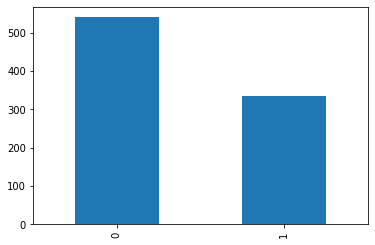

In [ ]:
train_df['Survived'].value_counts().plot(kind='bar')

In [ ]:
# Ratio between target values
survive_to_die_rario=train_df['Survived'].value_counts()[1]/train_df['Survived'].value_counts()[0]
survive_to_die_rario

0.6222222222222222

From the result above it is balanced dataset because the ratio is more than 0.5

trying resampling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(x, y)
train_df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
x= oversampled_X
y= oversampled_Y
oversampled_X

,Pclass,Age,SibSp,Parch,Ticket,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.566755,0.554912,0.0,-0.424490,-0.496235,0,0,1,0,0,1
1,1,0.656017,0.554912,0.0,-0.429897,0.785795,0,1,0,1,0,0
2,3,-0.261062,-0.501833,0.0,4.238396,-0.482720,1,1,0,0,0,1
3,1,0.426747,0.554912,0.0,-0.284257,0.421741,0,1,0,0,0,1
4,3,0.426747,-0.501833,0.0,0.108815,-0.480218,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1,1.615363,0.554912,0.0,-0.411217,0.914476,0,0,0,1,0,0
1076,3,-0.002513,1.030353,0.0,4.238393,-0.406035,0,1,0,0,0,1
1077,3,-0.309090,-0.501833,0.0,-0.438430,-0.159584,1,0,1,0,0,1
1078,1,0.526633,-0.501833,0.0,-0.429660,7.131831,1,0,0,1,0,0


In [ ]:
# Ratio between target values
survive_to_die_rario=train_df['Survived'].value_counts()[1]/train_df['Survived'].value_counts()[0]
survive_to_die_rario

1.0

Train validation split 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2)


#ML /Models

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score,GridSearchCV
parameters={'n_estimators':[200],'learning_rate':[0.1],'max_depth':[6],'reg_lambda':[5,10,20,50,100]}
model=XGBClassifier()
grid_search=GridSearchCV(model,parameters)
grid_search.fit(x_train,y_train)
print(grid_search.best_estimator_)
# model.fit(x_train,y_train)
# y_pred=model.predict(x_valid)
# scores=cross_val_score(grid_search,x_valid,y_valid,cv=5)
y_pred=grid_search.predict(x_valid)

# print(scores.mean())

print(f'Train Accuracy = {accuracy_score(y_train,grid_search.predict(x_train))}')
print(f'Train F1 Score = {f1_score(y_train,grid_search.predict(x_train))}')

print(f'Valid Accuracy = {accuracy_score(y_valid,y_pred)}')
print(f'Valid F1 Score = {f1_score(y_valid,y_pred)}')

XGBClassifier(max_depth=6, n_estimators=200, reg_lambda=20)
Train Accuracy = 0.9409722222222222
Train F1 Score = 0.93935790725327
Valid Accuracy = 0.8101851851851852
Valid F1 Score = 0.8019323671497584


Deep neural network

In [ ]:
from tensorflow.keras import layers,models,optimizers,losses

nn_model =models.Sequential([
                   layers.Dense(units=512,activation='relu'),
                   layers.Dropout(0.2),
                   layers.Dense(units=64,activation='relu'),
                   layers.Dropout(0.5),
                   layers.Dense(units=64,activation='leaky_relu'),
                   layers.Dropout(0.2),
                  #  layers.Dense(units=32,activation='leaky_relu'),
                   layers.Dense(units=1,activation='sigmoid'),
])
nn_model.compile(optimizer=optimizers.Adam(learning_rate=0.0005),loss=losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', baseline=1)
nn_model.fit (x_train,y_train,epochs=200)
y_pred_train=nn_model.predict(x_train)
y_pred_train=np.apply_along_axis(lambda x : 1 if x >=0.5 else 0 ,axis=1,arr=y_pred_train)

y_pred_valid=nn_model.predict(x_valid)
y_pred_valid=np.apply_along_axis(lambda x : 1 if x >=0.5 else 0 ,axis=1,arr=y_pred_valid)

print(f'Train Accuracy = {accuracy_score(y_train,y_pred_train)}')
print(f'Train F1 Score = {f1_score(y_train,y_pred_train)}')

print(f'Valid Accuracy = {accuracy_score(y_valid,y_pred_valid)}')
print(f'Valid F1 Score = {f1_score(y_valid,y_pred_valid)}')

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


27/27 [==============================] - 2s 3ms/step - loss: 0.6644 - accuracy: 0.5914
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7222
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7824
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7998
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8229
Epoch 6/200
27/27 [==============================] - 0s 9ms/step - loss: 0.4411 - accuracy: 0.8009
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8113
Epoch 8/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8102
Epoch 9/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4024 - accuracy: 0.8079
Epoch 10/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8125
Epoch 11/200
27/27 [=

Support Vector Machine

In [ ]:
from sklearn import svm 
svm_model=svm.NuSVC()
svm_model.fit(x_train,y_train)

y_pred=svm_model.predict(x_valid)

print(f'Train Accuracy = {accuracy_score(y_train,svm_model.predict(x_train))}')
print(f'Train F1 Score = {f1_score(y_train,svm_model.predict(x_train))}')

print(f'Valid Accuracy = {accuracy_score(y_valid,y_pred)}')
print(f'Valid F1 Score = {f1_score(y_valid,y_pred)}')

Train Accuracy = 0.8252314814814815
Train F1 Score = 0.8147239263803682
Valid Accuracy = 0.7824074074074074
Valid F1 Score = 0.7661691542288557


#Prepare test dataset

In [ ]:
test_df=pd.read_csv('test.csv',index_col='PassengerId')
# test_df=test_df.drop(['Name','Ticket'],axis=1)
test_df=test_df.drop(['Name'],axis=1)
test_df=test_df.drop('Cabin',axis=1)
test_df['Ticket']=test_df['Ticket'].apply(lambda x : x.split(' ')[-1] if len(x.split(' ')) >=2 else x)
test_df['Ticket']=test_df['Ticket'].apply(lambda x : x if x[0].isdigit() else np.NAN)

test_df['IsAlone']=test_df['SibSp'] + test_df['Parch']
test_df['IsAlone']=test_df['IsAlone'].apply(lambda x: 0 if x >0 else 1)

test_df[['Age','Parch','Ticket']]=numirical_imputer.transform(test_df[['Age','Parch','Ticket']])
test_df[['Embarked','Sex','Fare']]=categorical_imputer.transform(test_df[['Embarked','Sex','Fare']])
# test_df['SibSp']=np.log1p(test_df['SibSp'])
# test_df['Fare']=np.log1p(test_df['Fare'])
# test_df['Ticket']=np.log1p(test_df['Ticket'])

col_to_standard=['Age','Fare','SibSp','Ticket']
test_df[col_to_standard]=scaler.transform(test_df[col_to_standard])

test_df=pd.get_dummies(test_df)
test_df

,Pclass,Age,SibSp,Parch,Ticket,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
892,3,0.388535,-0.501833,0.0,0.044416,-0.484638,1,0,1,0,1,0
893,3,1.343825,0.554912,0.0,0.093407,-0.501240,0,1,0,0,0,1
894,2,2.490174,-0.501833,0.0,-0.092793,-0.447433,1,0,1,0,1,0
895,3,-0.184639,-0.501833,0.0,0.020562,-0.467955,1,0,1,0,0,1
896,3,-0.566755,0.554912,1.0,4.238421,-0.395378,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,-0.108216,-0.501833,0.0,-0.451641,-0.480218,1,0,1,0,0,1
1306,1,0.732440,-0.501833,0.0,-0.429657,1.538929,1,1,0,1,0,0
1307,3,0.694228,-0.501833,0.0,4.238366,-0.496235,1,0,1,0,0,1


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    float64
 3   Parch       418 non-null    float64
 4   Ticket      418 non-null    float64
 5   Fare        418 non-null    float64
 6   IsAlone     418 non-null    int64  
 7   Sex_female  418 non-null    uint8  
 8   Sex_male    418 non-null    uint8  
 9   Embarked_C  418 non-null    uint8  
 10  Embarked_Q  418 non-null    uint8  
 11  Embarked_S  418 non-null    uint8  
dtypes: float64(5), int64(2), uint8(5)
memory usage: 28.2 KB


In [ ]:
test_preds_xbg=grid_search.predict(test_df)
test_preds_svm=svm_model.predict(test_df)
y_test=nn_model.predict(test_df)
y_test=np.apply_along_axis(lambda x : 1 if x >=0.5 else 0 ,axis=1,arr=y_test)
test_preds_nn=y_test

In [ ]:
output_xgb = pd.DataFrame({'PassengerId': test_df.index,
                       'Survived': test_preds_xbg})
output_xgb.to_csv('submission_xgb4.0.csv', index=False)

output_nn = pd.DataFrame({'PassengerId': test_df.index,
                       'Survived': test_preds_svm})
output_nn.to_csv('submission_svm3.0.csv', index=False)

output_nn = pd.DataFrame({'PassengerId': test_df.index,
                       'Survived': test_preds_nn})
output_nn.to_csv('submission_nn3.0.csv', index=False)